## 지도학습(Supervised) > 분류(Classification)

### 1. kNN(k-최근접) 알고리즘을 사용한 이진분류 

- 머신러닝에서 여러 개의 종류(class라고 부른다) 중 하나를 구별해 내는 문제를
  분류(classification)라고 부른다.
  - 특히 이번처럼 2개의 클래스 중 하나를 고르는 문제를 이진 분류(binary classification) 라고 한다.


- 2진분류는 찾으려는 대상을 1로 놓고 그 외에는 0으로 놓는다.(e.g., 생선이 주어졌을때에 도미인지 찾으려면, 도미=1, 빙어(or another type)=0 )


- 각 도미의 길이와 무게로 표현한 이특징을 특성(feature)이라고 부른다.
- 특성은 데이터의 특징이다. 


- 가장 간단한 머신러닝 알고리즘 중 하나인 k-최근접 이웃을 사용하여 2개의 종류를 분류하는 머신러닝 모델을 훈련한다.

#### 생선분류 문제 
생선들중 우선 도미와 빙어를 프로그램으로 분류한다. 

생선의 특징(데이터)으로 분류할 수 있다. --> 생선의 무게와 길이


### 1. 데이터 수집
과거의 데이터를 준비한다.

In [1]:
#도미의 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

<function matplotlib.pyplot.show(close=None, block=None)>

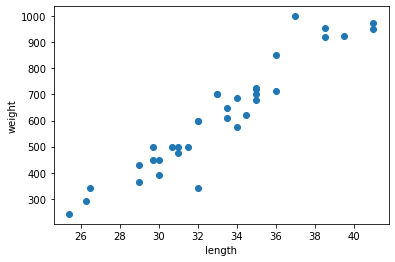

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [3]:
#빙어의 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

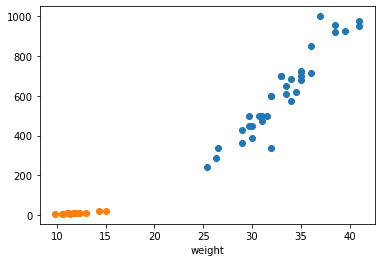

In [4]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

#### k-Nearest Neighbors 알고리즘
k-최근접 이웃(k-Nearest Neighbors) 알고리즘 사용해서 도미와 빙어 데이터를 구분한다

In [5]:
length = bream_length + smelt_length # 리스트 + 리스트 = 리스트. 도미먼저, 그다음 빙어
weight = bream_weight + smelt_weight

### zip() 내포리스트 구문

머신러닝 패키지로 사이킷런(scikit-learn)를 사용하기 위해서는 세로 방향의 2차원 리스트 (리스트 안에 리스트)를 사용해야한다.
- scikit-learn은 각 특성의 리스트를 세로 방향으로 늘어뜨린 2차원 리스트를 만들어야 한다

- zip() 함수와 리스트 내포(list comprehension) 구문을 사용한다.
- zip() 함수는 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환한다.
  하나씩 꺼낸데이터에 동일한 작업을 계속 반복하는 일을 for 문으로 한다.
- zip() 함수와 리스트 내포 구문을 사용해 length와 weight를 담은 리스트의 리스트(2차원 리스트)를 만든다.

In [7]:
fish_data =[[l,w] for l,w in zip(length, weight)]
print(fish_data) #49개의 (도미 35개 + 빙어 14개) 생선 데이터

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


생선의 길이와 무게를 보고 도미와 빙어를 구분하는 규칙을 찾아야 한다.

규칙을 찾기 위해서 어떤 특성을 가진 생선이 도미인지 빙어인지를 알려주기위해 정답 데이터를 준비한다.

- 두개의 특성을 가진 첫 번째 생선은 도미고 , 두 번째 생선도 도미라는 식으로
  각각 어떤 생선인지 답을 만들어야 한다.
- 정답 데이터는 도미와 빙어를 대신해 간단히 숫자 1과 0으로 표현한다.

In [8]:
# 1: 도미, 0: 빙어
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 2. 모델 구조 만들기 

#### scikitlearn 패키지 설치 및 KNeighborsClassifier객체 생성

사이킷런 패키지 설치 후  k-최근접 이웃 알고리즘을 구현한 클래스인 KNeighborsClassifier를 인포트하여 객체를 만들어 사용한다.

In [9]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=75c616293bf7382374e1450976a412597c19cb65dcb0ca30a3a9d8d93de7261b
  Stored in directory: c:\users\playdata\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [10]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

### 3. 훈련과정 (training / fit)

KNeighborsClassifier 객체에 fish_data와 fish_target을 전달하여 도미를 찾기위한 기준을 학습시킨다.

사이킷런에서 fit() 메소드가 주어진 데이터로 알고리즘을 훈련한다.

데이터로 훈련시키는 것은 **모델**인데, 여기에선 이미 만들어져있는 KNeighborsClassifier객체(알고리즘)을 사용한다. 

**※ 머신러닝에서의 모델:** 머신러닝 알고리즘을 구현한 프로그램을 모델(model)이라고 부른다
또는 프로그램이 아니더라도 알고리즘을(수식 등으로) 구체화 하여 표현한 것을 모델이라 부른다.

In [11]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

### 4. 모델 이용/ 모델 평가

- 훈련된 객체(또는 모델) kn이 얼마나 잘 훈련되었는지 평가한다.

#### score() 메소드 활용
- 사이킷런에는 모델을 평가하는 score() 메소드가 있다.
- score() 메소드는 0과 1 사이의 값을 반환한다.1은 모든 데이터를 정확히 맞혔다는 것을 나타내고 0.5는 절반만 맞혔다는 의미이다.

In [12]:
#score()에 넣은 훈련데이터와 정답 데이터는 훈련시 사용한 데이터 셋 그대로이기때문에
# 결과가 1.0이다. 이 모델은 모든 데이터를 정확하게 맞칠 수 있다.
kn.score(fish_data, fish_target)

1.0

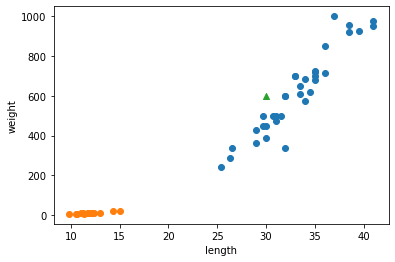

In [13]:
#unknown 생선이 도미인지 빙어인지 판단해보자.

# scatter plot에 unknown 생선 표기(삼각형)
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^') # 삼각형 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

직관적으로 이 삼각형은 도미라고 판단할 것이다. 왜냐하면 삼각형 주변에
  다른 도미 데이터가 많기 때문이다.
  
#### predict() 메소드 활용

- k-최근접 이웃 알고리즘도 삼각형 주위에 도미 데이터가 많기 때문에 도미
  라고 판단 할 것이다.
- 확인을 위해 predict()를 사용하여 새로운 데이터의 정답을 예측할 수 있다.
  반환되는 값은 클래스에 해당하는 1 또는 0이 된다.
- 이 메소드도 fit()처럼 리스트의 리스트를 전달한다.

In [14]:
#predict(unknown fish data) 결과가 1이라면, 생선은 도미로 분류된다. which is correct.
kn.predict([[30,600]])

array([1])

- 새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지를 살피면 된다.
- KNeighborsClassfier클래스의 
         _fit_X속성은  fish_data를 가지고 있다. 
         _y속성에는 fish_target 을 가지고 있다

In [17]:
print(kn._fit_X)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


### kNN 알고리즘의 n_neighbors

- 실제로 k-최근접 이웃 알고리즘은 무언가 훈련하는 것이 fit()메서드에 전달한 
  데이터를 모두 저장하고 있다가 새로운 데이터가 등장하면 가장 가까운 데이터를
  참고 하여 도미인지 빙어인지 구분한다.
  
  
- 데이터를 참고할 때 기본 값이 5개이다. (n_neighbors = 5)
- 이기준은 n_neighbors 매개변수로 바꿀수 있다.

#### 만약 모델의 n_neighbors 값을 키운다면??

- 만약 참고 데이터를 49개를 사용하는 모델(kn49)을 만들면 오히려 정확도가 떨어지는것을 볼수있다.
- unknown fish의 가장 근접 5개 데이터가 아닌, 전체 49개 데이터를 모두 사용하여 predict하려고 하기때문에 정화도가 오히려 떨어지는것이다.

In [19]:
kn49 = KNeighborsClassifier(n_neighbors = 49) #근접데이터 49개를 사용하는 새로운 kNN 모델 생성
kn49.fit(fish_data, fish_target) #모델 훈련
kn49.score(fish_data, fish_target) #모델의 정확도 확인

0.7142857142857143

## scikit-learn 정리

**n_neighbors()**
- KNeighborsClassfier는 k-최근접 이웃 분류 모델을 만드는 scikit-learn 패키지의 클래스이다.
- n_neighbors 매개변수로 예측하려는 값의 이웃 데이터 개수를 지정한다. 기본값은 5이다.
  
  
**fit()**  
- scikit-learn 모델을 훈련할 때 사용하는 메서드이다. parameter로 특성(훈련용 과거 데이터)과 정답 데이터(과거 데이터를 토대로 이미 결과를 확인한 데이터)를 전달한다.


**predict()**
- scikit-learn 모델을 훈련 후 예측할 때 사용하는 메소드 이다. 특성 데이터 하나만 받는다.


**score()**
- 훈련된 scikit-learn 모델의 성능을 측정한다. 특성과 정답 데이터를 전달한다. 
- 먼저 predict()로 예측 수행 후 분류 모델일 경우 정답과 비교하여 올바르게 예측한 개수의 비율을 반환한다. 